In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import numpy
import astrohack_projections

# create one crazy looking Gaussian for the 3D model
mu = numpy.array((1, 1.5, 1))
fi = 0
for i in xrange(3):
    v = numpy.random.normal(size=3)
    fi += numpy.outer(v, v)

gal_model = astrohack_projections.galaxy_model_3d()
gal_model.add_gaussian(1.0, mu, fi)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


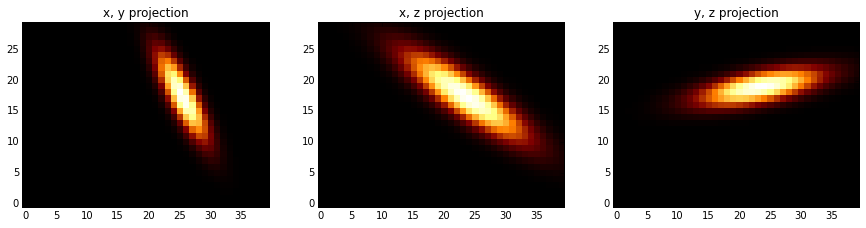

In [16]:
plt.rcParams['figure.figsize'] = 15,5

plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

xs = numpy.linspace(-5, 5, 30)
ys = numpy.linspace(-5, 5, 40)
X, Y = numpy.meshgrid(xs, ys)

# plot the projections
plt.subplot(1, 3, 1)
xi_hat = numpy.array((1, 0, 0))
eta_hat = numpy.array((0, 1, 0))
densities = gal_model.render_2d_image(xi_hat, eta_hat, xs, ys)
plt.imshow(densities, **plot_kwargs)
plt.title("x, y projection")

plt.subplot(1, 3, 2)
xi_hat = numpy.array((1, 0, 0))
eta_hat = numpy.array((0, 0, 1))
densities = gal_model.render_2d_image(xi_hat, eta_hat, xs, ys)
plt.imshow(densities, **plot_kwargs)
plt.title("x, z projection")

plt.subplot(1, 3, 3)
xi_hat = numpy.array((0, 1, 0))
eta_hat = numpy.array((0, 0, 1))
densities = gal_model.render_2d_image(xi_hat, eta_hat, xs, ys)
plt.imshow(densities, **plot_kwargs)
plt.title("y, z projection")

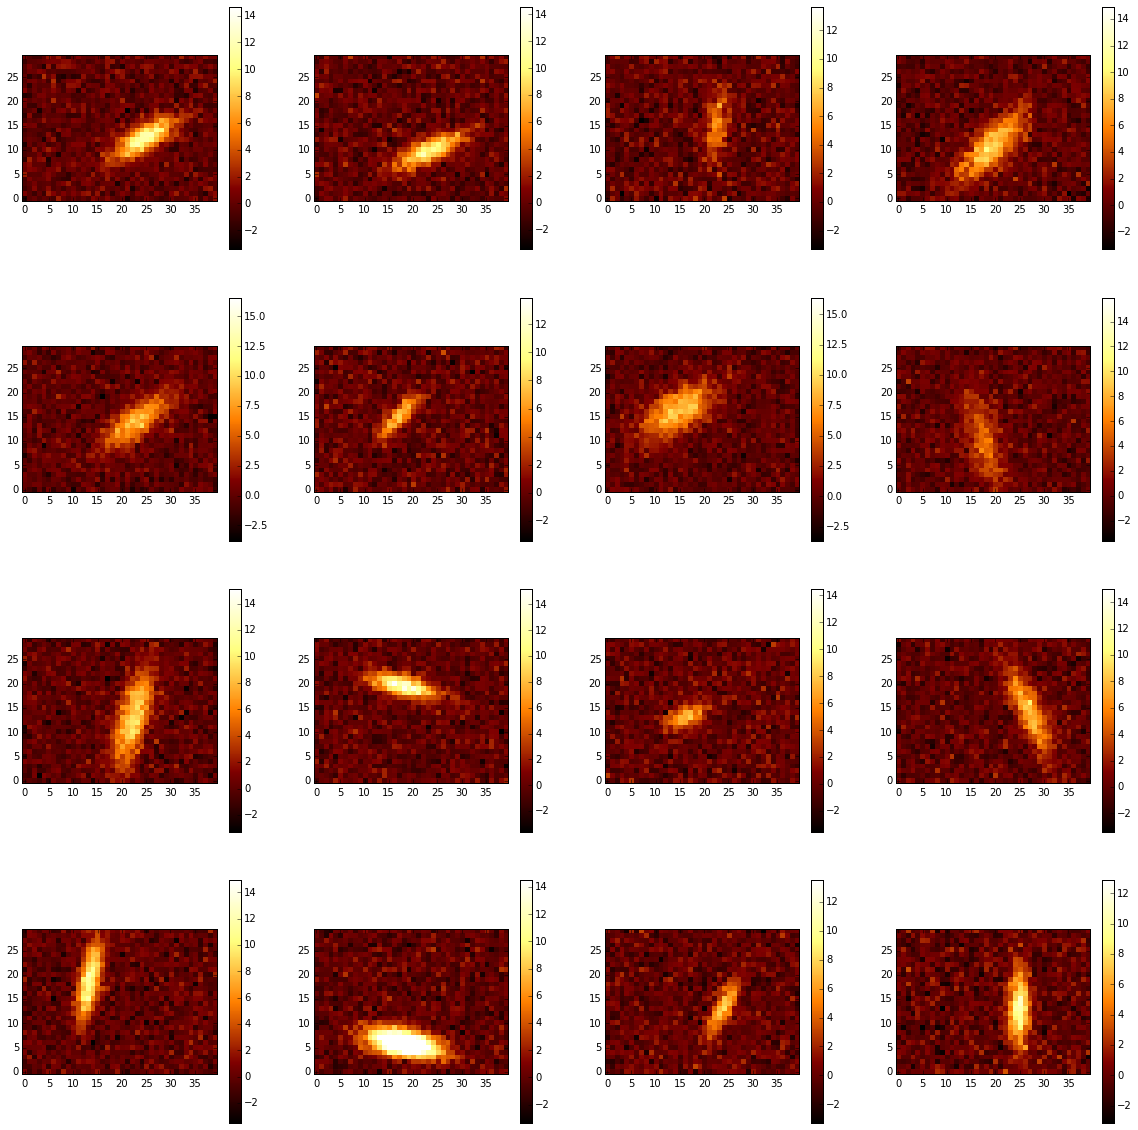

In [27]:
# randomise 16 different projections and create noisy images of these projections
# randomise all the parameters that are needed for that

plt.rcParams['figure.figsize'] = 20, 20

album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

for i in xrange(16):
    image = astrohack_projections.image_and_model()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, size=3)
    intensity = numpy.random.uniform(50.0, 100.0)
    scale = 0.25 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)

    image = astrohack_projections.image_and_model()
    image.set_shape((30, 40))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.construct_synthetic()
    image.set_data(image.get_synthetic() + numpy.random.normal(size=image.get_shape()) / numpy.sqrt(image.ivar))

    # plot
    a, mid = numpy.percentile(image.get_data(), [25., 50.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran

    plt.subplot(4, 4, i+1)
    plt.imshow(image.get_data(), vmin=vmin, vmax=vmax, **plot_kwargs)
    plt.colorbar()
    
    # save to album
    album.add_image(image)
    